Sources:

https://github.com/Coding-Crashkurse/RAG-Evaluation-with-Ragas/blob/main/ragas.ipynb
https://www.youtube.com/watch?v=aeae-sITqEA

In [ ]:
!pip install langchain langchain-community

Youtube Link:
https://www.youtube.com/watch?v=aeae-sITqEA

In [1]:
# SIMULATING THE APP HERE, ONLY FOR 1 DOCUMENT
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
data_path = "Aspect Detection and Sentiment Classification using Deep Neural Network for Indonesian Aspect-Based Sentiment Analysis.pdf"

print("Loading PDF...")
loader = PyPDFLoader(data_path)
pages = loader.load()

for page in pages:
  page.metadata['file_name'] = page.metadata['source']

print(f"PDF loaded: {data_path}...")

print("Splitting text...")
# Initialize the RecursiveCharacterTextSplitter for splitting text
# predefined length -- how many chars do we want per chunk
# overlap - character 0 - 1000, first document. Then, there's an overlap of +-150 characters between doc 1 and doc 2
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=1000, chunk_overlap=50)
chunked_documents = text_splitter.split_documents(pages)

print('Length of chunks:', len(chunked_documents))

Loading PDF...
PDF loaded: Aspect Detection and Sentiment Classification using Deep Neural Network for Indonesian Aspect-Based Sentiment Analysis.pdf...
Splitting text...
Length of chunks: 34


In [1]:
# SIMULATING THE APP HERE, FOR MULTI DOCUMENT
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
data_path = "."

print("Loading directory...")
# pdf_loader = PyPDFDirectoryLoader(path=data_path, glob="**/*.pdf", recursive=True)
pdf_loader = PyPDFDirectoryLoader(path=data_path, glob="*.pdf", recursive=True)
documents = pdf_loader.load()

for document in documents:
  document.metadata['file_name'] = document.metadata['source']

print("Directory loaded...")
print("Documents length:", len(documents))

print("Splitting text...")
# Initialize the RecursiveCharacterTextSplitter for splitting text
# predefined length -- how many chars do we want per chunk
# overlap - character 0 - 1000, first document. Then, there's an overlap of +-150 characters between doc 1 and doc 2
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
chunked_documents = text_splitter.split_documents(documents)

# Remove the bibiography of each PDF ?? Maybe not needed
print('Length of chunks:', len(chunked_documents))

Loading directory...
Directory loaded...
Documents length: 34
Splitting text...
Length of chunks: 165


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
openai_api_key=os.environ["OPENAI_API_KEY"]
print("done")

done


In [3]:
# "gpt-4-1106-preview"
GPT_MODEL = "gpt-3.5-turbo-0125"
CRITIC_MODEL = "gpt-4-turbo"
EMBEDDING_MODEL = "text-embedding-ada-002"

In [4]:
chunked_documents

[Document(page_content='Designing the Human-Computer Interface  \nAuthor(s): Harold J. Goldes  \nSource: Educational Technology , October, 1983 , Vol. 23, No. 10 (October, 1983), pp. 9-15  \nPublished by: Educational Technology Publications, Inc.  \nStable URL: https://www.jstor.org/stable/44425106\nJSTOR is a not-for-profit service that helps scholars, researchers, and students discover, use, and build upon a wide \nrange of content in a trusted digital archive. We use information technology and tools to increase productivity and \nfacilitate new forms of scholarship. For more information about JSTOR, please contact support@jstor.org. \n \nYour use of the JSTOR archive indicates your acceptance of the Terms & Conditions of Use, available at \nhttps://about.jstor.org/terms\nis collaborating with JSTOR to digitize, preserve and extend access to Educational Technology\nThis content downloaded from \n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0064.224.100.114 on Mon, 29 Apr 2024 20:43:39 +

In [5]:

from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context

generator = TestsetGenerator.with_openai()

generator_llm = "gpt-3.5-turbo-0125" #being used in the app
# critic_llm = "gpt-4-turbo" #to be used by the evaluator
critic_llm = "gpt-3.5-turbo-0125" #to be used by the evaluator
embeddings = "text-embedding-ada-002" #being used in the app

generator = TestsetGenerator.with_openai(
    generator_llm,
    critic_llm,
    embeddings
)

# Test sets are 20% simple, 45% are reasoning, and 35% to be multi_context
distributions = {
    simple: 0.20,
    reasoning: 0.45,
    multi_context: 0.35
}

#todo: test
# distributions = {
#     simple: 0.35,
#     reasoning: 0.2,
#     multi_context: 0.45
# }

total_weight = sum(distributions.values())
if total_weight == 1:
    print("Distribution is valid.")
else:
    print(f"Total weight is {total_weight}, which does not equal 1. Please adjust your distribution.")

# generate testset
testset = generator.generate_with_langchain_docs(chunked_documents, test_size=15, distributions=distributions)

c:\Users\louis\Desktop\ay2023-2024-1st-sem-cmsc190-sp1-ridiculoys\code\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\louis\AppData\Local\Temp\ipykernel_14948\2795921569.py:4: DeprecationWarning: The function with_openai was deprecated in 0.1.4, and will be removed in the 0.2.0 release. Use from_langchain instead.
  generator = TestsetGenerator.with_openai()
C:\Users\louis\AppData\Local\Temp\ipykernel_14948\2795921569.py:11: DeprecationWarning: The function with_openai was deprecated in 0.1.4, and will be removed in the 0.2.0 release. Use from_langchain instead.
  generator = TestsetGenerator.with_openai(


Distribution is valid.


Filename and doc_id are the same for all nodes.                   
Generating: 100%|██████████| 15/15 [04:55<00:00, 19.70s/it]


In [6]:
testset.to_pandas()

question  \
0   How does the social facilitation framework exp...   
1   How are social and psychological needs embedde...   
2   How can the approaches of information research...   
3   How do electronic displays differ from printed...   
4   How do users handle software biases in educati...   
5   How can user input benefit information seeking...   
6   How was human-computer interaction studied in ...   
7   How does metaphor translation impact interface...   
8   How is usability defined in information retrie...   
9   How do computer icons impact social facilitati...   
10  How do beliefs, attitudes, and interface affec...   
11  How does CASA explain human-computer interacti...   
12  How does the interactive display enhance real-...   
13  How do human factors, user needs, and design m...   

                                             contexts  \
0   [tics may inﬂuence human–computer interactions...   
1   [to the social and psychological needs of user...   
2   [118 Journal of Education for Library and info...   
3   [but with a different source metaphor; text pr...   
4   [gender of the user influence successful use? ...   
5   [118 Journal of Education for Library and info...   
6   [Based on the above theoretical framework an \...   
7   [tual workspace that corresponds to some real ...   
8   [122 Journal of Education for Library and Info...   
9   [effects in human–computer interactions.\nIn t...   
10  [physical point of contact; it also includes t...   
11  [cial facilitation when a person works alone o...   
12  [Perceptive Human-computer Interaction \n1) Mu...   
13  [human factors or user needs. The design proce...   

                                         ground_truth evolution_type  \
0   The social facilitation framework may explain ...         simple   
1   The social and psychological needs of users ar...         simple   
2   The respective approaches of information resea...         simple   
3   Electronic displays differ from printed text i...      reasoning   
4   Research is needed to determine how software b...      reasoning   
5   User input can benefit information seeking and...      reasoning   
6   An empirical study of human-computer interacti...      reasoning   
7   Metaphor translation impacts interface design ...      reasoning   
8   Usability in information retrieval system desi...      reasoning   
9   Computer icons are believed to elicit social f...  multi_context   
10  Beliefs, attitudes, and interface play a signi...  multi_context   
11  The CASA paradigm posits that people interact ...  multi_context   
12  The interactive display enhances real-time int...  multi_context   
13  Human factors, user needs, and design metaphor...  multi_context   

                                             metadata  episode_done  
0   [{'source': 'Social facilitation and human–com...          True  
1   [{'source': 'Social Aspects of Human-Computer ...          True  
2   [{'source': 'User-Centered Design for Informat...          True  
3   [{'source': 'Designing the Human-Computer Inte...          True  
4   [{'source': 'Social Aspects of Human-Computer ...          True  
5   [{'source': 'User-Centered Design for Informat...          True  
6   [{'source': 'Social Aspects of Human-Computer ...          True  
7   [{'source': 'Designing the Human-Computer Inte...          True  
8   [{'source': 'User-Centered Design for Informat...          True  
9   [{'source': 'Social facilitation and human–com...          True  
10  [{'source': 'Social Aspects of Human-Computer ...          True  
11  [{'source': 'Social facilitation and human–com...          True  
12  [{'source': 'Research on Application of Percep...          True  
13  [{'source': 'Designing the Human-Computer Inte...          True

In [7]:
testset.to_pandas().to_csv('testset.csv', index=False)

In [8]:
import pandas as pd

testset = pd.read_csv("testset.csv")

In [9]:
testset

question  \
0   How does the social facilitation framework exp...   
1   How are social and psychological needs embedde...   
2   How can the approaches of information research...   
3   How do electronic displays differ from printed...   
4   How do users handle software biases in educati...   
5   How can user input benefit information seeking...   
6   How was human-computer interaction studied in ...   
7   How does metaphor translation impact interface...   
8   How is usability defined in information retrie...   
9   How do computer icons impact social facilitati...   
10  How do beliefs, attitudes, and interface affec...   
11  How does CASA explain human-computer interacti...   
12  How does the interactive display enhance real-...   
13  How do human factors, user needs, and design m...   

                                             contexts  \
0   ['tics may inﬂuence human–computer interaction...   
1   ["to the social and psychological needs of use...   
2   ['118 Journal of Education for Library and inf...   
3   ['but with a different source metaphor; text p...   
4   ['gender of the user influence successful use?...   
5   ['118 Journal of Education for Library and inf...   
6   ["Based on the above theoretical framework an ...   
7   ['tual workspace that corresponds to some real...   
8   ['122 Journal of Education for Library and Inf...   
9   ['effects in human–computer interactions.\nIn ...   
10  ['physical point of contact; it also includes ...   
11  ['cial facilitation when a person works alone ...   
12  ['Perceptive Human-computer Interaction \n1) M...   
13  ['human factors or user needs. The design proc...   

                                         ground_truth evolution_type  \
0   The social facilitation framework may explain ...         simple   
1   The social and psychological needs of users ar...         simple   
2   The respective approaches of information resea...         simple   
3   Electronic displays differ from printed text i...      reasoning   
4   Research is needed to determine how software b...      reasoning   
5   User input can benefit information seeking and...      reasoning   
6   An empirical study of human-computer interacti...      reasoning   
7   Metaphor translation impacts interface design ...      reasoning   
8   Usability in information retrieval system desi...      reasoning   
9   Computer icons are believed to elicit social f...  multi_context   
10  Beliefs, attitudes, and interface play a signi...  multi_context   
11  The CASA paradigm posits that people interact ...  multi_context   
12  The interactive display enhances real-time int...  multi_context   
13  Human factors, user needs, and design metaphor...  multi_context   

                                             metadata  episode_done  
0   [{'source': 'Social facilitation and human–com...          True  
1   [{'source': 'Social Aspects of Human-Computer ...          True  
2   [{'source': 'User-Centered Design for Informat...          True  
3   [{'source': 'Designing the Human-Computer Inte...          True  
4   [{'source': 'Social Aspects of Human-Computer ...          True  
5   [{'source': 'User-Centered Design for Informat...          True  
6   [{'source': 'Social Aspects of Human-Computer ...          True  
7   [{'source': 'Designing the Human-Computer Inte...          True  
8   [{'source': 'User-Centered Design for Informat...          True  
9   [{'source': 'Social facilitation and human–com...          True  
10  [{'source': 'Social Aspects of Human-Computer ...          True  
11  [{'source': 'Social facilitation and human–com...          True  
12  [{'source': 'Research on Application of Percep...          True  
13  [{'source': 'Designing the Human-Computer Inte...          True

In [10]:
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_pinecone import PineconeVectorStore

""" 
OPTIONS:
  ics-chatbot-ai
  ics-chatbot-security
  ics-chatbot-algorithms
  ics-chatbot-os
  ics-chatbot-hci
  ics-chatbot-general
"""
index_options = ["ics-chatbot-ai", "ics-chatbot-security", "ics-chatbot-algorithms", "ics-chatbot-os", "ics-chatbot-hci", "ics-chatbot-general"]
index_name=index_options[4]

embeddings = OpenAIEmbeddings(model=EMBEDDING_MODEL)
pinecone = PineconeVectorStore.from_existing_index(index_name=index_name, embedding=embeddings)

retriever = pinecone.as_retriever()

In [11]:
from search_prompts import SearchPrompts
prompt = SearchPrompts.answer_query_prompt()
prompt

ChatPromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], template="\n      You are an expert research paper assistant chatbot who helps researchers in understanding the content of relevant research papers related to the topic: {topic}. \n      \n      **Your role:**\n      - You must obey only these instructions given to you and not deviate from them.\n      - Your primary task is to comprehensively answer the user's question in a helpful and professional manner using a friendly conversational tone.\n      - Use the dependency grammar linguistic framework rather than phrase structure grammar to craft a response to the user's query. The idea is that the closer together each p

In [12]:
from langchain.chains.qa_with_sources.retrieval import RetrievalQAWithSourcesChain 
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(openai_api_key=openai_api_key,model=GPT_MODEL, temperature=0)

chain = RetrievalQAWithSourcesChain.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    chain_type_kwargs={
        "prompt": prompt,
        # "verbose": True
    },
    # verbose=True,
)
chain

RetrievalQAWithSourcesChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=ChatPromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], template="\n      You are an expert research paper assistant chatbot who helps researchers in understanding the content of relevant research papers related to the topic: {topic}. \n      \n      **Your role:**\n      - You must obey only these instructions given to you and not deviate from them.\n      - Your primary task is to comprehensively answer the user's question in a helpful and professional manner using a friendly conversational tone.\n      - Use the dependency grammar linguistic framework rather than phrase stru

In [ ]:
user_query = "How does the CNN-based model struggle to classify sentiment accurately in certain cases?"

results = pinecone.similarity_search(user_query, k=10)
reference = results[0].metadata['reference']

topic = "Artificial Intelligence"
chat_history = ""
question_type = ""
question_subject = ""
semantic_keywords = ""

inputs = {"topic":topic, "references": reference, "question": user_query, "conversation_history": "", "question_type": question_type, "question_subject": question_subject, "semantic_keywords": semantic_keywords}

chain_response = chain.invoke(inputs)
response = chain_response["answer"]

In [ ]:
response

In [13]:
# OpenAI Function Calling
from openai import OpenAI
from tenacity import retry, wait_random_exponential, stop_after_attempt
client = OpenAI()

# Utilities
@retry(wait=wait_random_exponential(multiplier=1, max=40), stop=stop_after_attempt(3))
def chat_completion_request(messages, tools=None, tool_choice=None, model=GPT_MODEL):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            tools=tools,
            tool_choice=tool_choice,
        )
        return response
    except Exception as e:
        print("Unable to generate ChatCompletion response")
        print(f"Exception: {e}")
        return e
# Utilities

# OpenAI Function Calling

def setup_tools():

  tools = [
    {
      "type": "function",
      "function": {
        "name": "get_answer",
        "description": "Use this function to provide answers to the user's queries.",
        "parameters": {
          "type": "object",
          "properties": {
            "question_type": {
              "type": "string",
              "description": "The nature of the user's inquiry if it is asking for clarification, context, definition, explanation, follow-up, comparison, results, list of papers, or any other type of inquiry."
            },
            "question_subject": {
              "type": "string",
              "description": "The specific topic or subject within the research paper or journal that the user is inquiring about."
            },
            "semantic_keywords": {
              "type": "string",
              "description": "The semantic keywords associated with the user query. Do not make assumptions from the query. Return as a comma-separated list."
            }
          },
          "required": ["question_type", "question_subject", "semantic_keywords"]
        }
      }
    }
  ]

  return tools

In [14]:
def answer_user_query(vectorstore, args, user_query, topic, chat_history):
  results=""
  try:
    results = vectorstore.similarity_search(user_query, k=5)
    # results = vectorstore.get_relevant_documents(user_query)

    filenames = list(set([result.metadata['file_name'] for result in results]))
    added = []

    references = []
    for result in results:
      if result.metadata['file_name'] in filenames and result.metadata['file_name'] not in added:
        references.append(result.metadata)
        added.append(result.metadata['file_name'])
    references = [reference['reference'] for reference in references]

    processed_chat_history = chat_history[1:-1] if len(chat_history) > 3 else ""

    question_type = args['question_type']
    question_subject = args['question_subject']
    semantic_keywords = args['semantic_keywords']

    inputs = {"topic":topic, "references": "\n".join(references), "question": user_query, "conversation_history": processed_chat_history, "question_type": question_type, "question_subject": question_subject, "semantic_keywords": semantic_keywords}
    chain_response = chain.invoke(inputs)
    response = chain_response["answer"]
  except Exception as e:
    response = f"query failed with error: {e}"
  return results, response

In [16]:
# questions = testset.to_pandas()["question"].to_list()
# ground_truth = testset.to_pandas()["ground_truth"].to_list()
questions = testset["question"].to_list()
ground_truth = testset["ground_truth"].to_list()
ground_truth = ["" if isinstance(element, float) else element for element in ground_truth]

print(questions)
print(ground_truth)

['How does the social facilitation framework explain why men and women may respond differently to the presence of a computer icon?', 'How are social and psychological needs embedded in the interface of technology, and why is it important to recognize and address them?', 'How can the approaches of information researchers and researchers in HCI be integrated to enhance the process of information seeking?', 'How do electronic displays differ from printed text and how does it impact user navigation?', 'How do users handle software biases in education and does gender affect success?', 'How can user input benefit information seeking and HCI research integration?', 'How was human-computer interaction studied in a diverse student group in high school and university?', 'How does metaphor translation impact interface design?', 'How is usability defined in information retrieval system design in academic journals?', 'How do computer icons impact social facilitation in typing tasks?', 'How do belie

In [17]:
from datasets import Dataset
import json

data = {"question": [], "answer": [], "contexts": [], "ground_truth": ground_truth}
tools = setup_tools()
chat_history = []
chat_history.append({"role": "system", "content": "You are a research assistant chatbot specializing in Computer Science. Your goal is to facilitate the user's research process by using the correct tool based on their queries. If the user query is not related to Computer Science, apologize and then respond in a friendly, professional, and conversational tone on how you are tasked to answer queries about Computer Science and then kindly ask them how else you can help. You should not independently answer questions from the user. ALWAYS use the function call to provide responses UNLESS you are asking the user for a follow-up or clarification for an ambiguous question. ALWAYS try to answer the most recent user message with a tool. ONLY use the earlier messages as context for the next tool to use. You can include words and contexts from the previous messages as inputs into the tool ONLY if needed to understand the query better. If a user request is ambiguous, you may respond directly and kindly ask for clarification to ensure you provide the most accurate and helpful information. Do not make assumptions about what values to plug into functions." })
topic = "Artificial Intelligence"

for query in questions:
    docs = ""
    response = ""
    chat_history.append({"role": "user", "content": query})

    chat_response = chat_completion_request(
        messages=chat_history, tools=tools
    )

    assistant_message = chat_response.choices[0].message

    if assistant_message.tool_calls:
        if assistant_message.tool_calls[0].function.name == "get_answer": 
            args = json.loads(assistant_message.tool_calls[0].function.arguments)
            print("args", args)
            docs, response = answer_user_query(pinecone, args, query, topic, chat_history)
        else:
            response = f"Error: function {assistant_message.tool_calls[0].function.name} does not exist"
    else:
        response = assistant_message.content

    data["question"].append(str(query))
    data["answer"].append(str(response))
    data["contexts"].append([str(doc.page_content) for doc in docs])
    print("query", query)
    print("response", response)
    chat_history = [chat_history[0]]

args {'question_type': 'explanation', 'question_subject': 'social facilitation framework and response to computer icon', 'semantic_keywords': 'men, women, social facilitation, computer icon, response'}
query How does the social facilitation framework explain why men and women may respond differently to the presence of a computer icon?
response According to Aiello and Svec [1], the social facilitation framework can explain why men and women may respond differently to the presence of a computer icon. In their study, they extended the social facilitation framework to electronic presence, suggesting that the perceived sex of the icon may have affected the results. Men showed social facilitation effects while women exhibited social inhibition in the presence of the computer icon.

References:
[1] J. R. Aiello and C. M. Svec, "Computer monitoring of work performance: Extending the social facilitation framework to electronic presence," *Journal of Applied Social Psychology*, vol. 23, pp. 537-

In [18]:
data

{'question': ['How does the social facilitation framework explain why men and women may respond differently to the presence of a computer icon?',
  'How are social and psychological needs embedded in the interface of technology, and why is it important to recognize and address them?',
  'How can the approaches of information researchers and researchers in HCI be integrated to enhance the process of information seeking?',
  'How do electronic displays differ from printed text and how does it impact user navigation?',
  'How do users handle software biases in education and does gender affect success?',
  'How can user input benefit information seeking and HCI research integration?',
  'How was human-computer interaction studied in a diverse student group in high school and university?',
  'How does metaphor translation impact interface design?',
  'How is usability defined in information retrieval system design in academic journals?',
  'How do computer icons impact social facilitation i

In [19]:
dataset = Dataset.from_dict(data)

In [20]:
dataset

Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truth'],
    num_rows: 14
})

In [21]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_relevancy,
    context_recall,
    context_precision,
)

result = evaluate(
    dataset = dataset,
    metrics=[
        context_relevancy,
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,
    ],
    raise_exceptions=False
)

Evaluating: 100%|██████████| 70/70 [02:54<00:00,  2.50s/it]


In [22]:
result.to_pandas()

question  \
0   How does the social facilitation framework exp...   
1   How are social and psychological needs embedde...   
2   How can the approaches of information research...   
3   How do electronic displays differ from printed...   
4   How do users handle software biases in educati...   
5   How can user input benefit information seeking...   
6   How was human-computer interaction studied in ...   
7   How does metaphor translation impact interface...   
8   How is usability defined in information retrie...   
9   How do computer icons impact social facilitati...   
10  How do beliefs, attitudes, and interface affec...   
11  How does CASA explain human-computer interacti...   
12  How does the interactive display enhance real-...   
13  How do human factors, user needs, and design m...   

                                               answer  \
0   According to Aiello and Svec [1], the social f...   
1   To address the social and psychological needs ...   
2   Approaches of information researchers and rese...   
3   Electronic displays differ from printed text i...   
4   Users handle software biases in education by m...   
5   User input can greatly benefit information see...   
6   Based on the study conducted by Lynch [1], hum...   
7   Metaphor translation plays a crucial role in i...   
8   [1] A. A. N. Schulze, "User-Centered Design fo...   
9   According to B. Hall and D.D. Henningsen [1], ...   
10  Beliefs, attitudes, and interface play a cruci...   
11  Mindlessness, as suggested by Langer (1992), e...   
12  According to the research by Wang and Fang [1]...   
13  Human factors, user needs, and design metaphor...   

                                             contexts  \
0   [tics may inﬂuence human–computer interactions...   
1   [to the social and psychological needs of user...   
2   [118 Journal of Education for Library and info...   
3   [but with a different source metaphor; text pr...   
4   [gender of the user influence successful use? ...   
5   [capabilities that enable us to cope with thes...   
6   [Based on the above theoretical framework an \...   
7   [human factors or user needs. The design proce...   
8   [User-Centered Design for Information Professi...   
9   [effects in human–computer interactions.\nIn t...   
10  [human-computer interface were in the con- \n ...   
11  [Mindlessness, as suggested by Langer (1992) ,...   
12  [Perceptive Human-computer Interaction \n1) Mu...   
13  [human factors or user needs. The design proce...   

                                         ground_truth  context_relevancy  \
0   The social facilitation framework may explain ...           0.032609   
1   The social and psychological needs of users ar...           0.068966   
2   The respective approaches of information resea...           0.027523   
3   Electronic displays differ from printed text i...           0.090909   
4   Research is needed to determine how software b...           0.051020   
5   User input can benefit information seeking and...           0.035714   
6   An empirical study of human-computer interacti...           0.078740   
7   Metaphor translation impacts interface design ...           0.081301   
8   Usability in information retrieval system desi...           0.054264   
9   Computer icons are believed to elicit social f...           0.049383   
10  Beliefs, attitudes, and interface play a signi...           0.043103   
11  The CASA paradigm posits that people interact ...           0.029412   
12  The interactive display enhances real-time int...           0.064103   
13  Human factors, user needs, and design metaphor...           0.100840   

    context_precision  context_recall  faithfulness  answer_relevancy  
0                 1.0            1.00      1.000000          0.918376  
1                 1.0            1.00      1.000000          0.880569  
2                 1.0            0.75      1.000000          0.989739  
3                 1.0            1.00      0.666

In [23]:
result.to_pandas().to_csv('data_with_scores.csv', index=False)

In [24]:
import pandas as pd

df = pd.read_csv('data_with_scores.csv')

df


question  \
0   How does the social facilitation framework exp...   
1   How are social and psychological needs embedde...   
2   How can the approaches of information research...   
3   How do electronic displays differ from printed...   
4   How do users handle software biases in educati...   
5   How can user input benefit information seeking...   
6   How was human-computer interaction studied in ...   
7   How does metaphor translation impact interface...   
8   How is usability defined in information retrie...   
9   How do computer icons impact social facilitati...   
10  How do beliefs, attitudes, and interface affec...   
11  How does CASA explain human-computer interacti...   
12  How does the interactive display enhance real-...   
13  How do human factors, user needs, and design m...   

                                               answer  \
0   According to Aiello and Svec [1], the social f...   
1   To address the social and psychological needs ...   
2   Approaches of information researchers and rese...   
3   Electronic displays differ from printed text i...   
4   Users handle software biases in education by m...   
5   User input can greatly benefit information see...   
6   Based on the study conducted by Lynch [1], hum...   
7   Metaphor translation plays a crucial role in i...   
8   [1] A. A. N. Schulze, "User-Centered Design fo...   
9   According to B. Hall and D.D. Henningsen [1], ...   
10  Beliefs, attitudes, and interface play a cruci...   
11  Mindlessness, as suggested by Langer (1992), e...   
12  According to the research by Wang and Fang [1]...   
13  Human factors, user needs, and design metaphor...   

                                             contexts  \
0   ['tics may inﬂuence human–computer interaction...   
1   ["to the social and psychological needs of use...   
2   ['118 Journal of Education for Library and inf...   
3   ['but with a different source metaphor; text p...   
4   ['gender of the user influence successful use?...   
5   ['capabilities that enable us to cope with the...   
6   ["Based on the above theoretical framework an ...   
7   ['human factors or user needs. The design proc...   
8   ["User-Centered Design for Information Profess...   
9   ['effects in human–computer interactions.\nIn ...   
10  ["human-computer interface were in the con- \n...   
11  ['Mindlessness, as suggested by Langer (1992) ...   
12  ['Perceptive Human-computer Interaction \n1) M...   
13  ['human factors or user needs. The design proc...   

                                         ground_truth  context_relevancy  \
0   The social facilitation framework may explain ...           0.032609   
1   The social and psychological needs of users ar...           0.068966   
2   The respective approaches of information resea...           0.027523   
3   Electronic displays differ from printed text i...           0.090909   
4   Research is needed to determine how software b...           0.051020   
5   User input can benefit information seeking and...           0.035714   
6   An empirical study of human-computer interacti...           0.078740   
7   Metaphor translation impacts interface design ...           0.081301   
8   Usability in information retrieval system desi...           0.054264   
9   Computer icons are believed to elicit social f...           0.049383   
10  Beliefs, attitudes, and interface play a signi...           0.043103   
11  The CASA paradigm posits that people interact ...           0.029412   
12  The interactive display enhances real-time int...           0.064103   
13  Human factors, user needs, and design metaphor...           0.100840   

    context_precision  context_recall  faithfulness  answer_relevancy  
0                 1.0            1.00      1.000000          0.918376  
1                 1.0            1.00      1.000000          0.880569  
2                 1.0            0.75      1.000000          0.989739  
3                 1.0            1.00      0.666

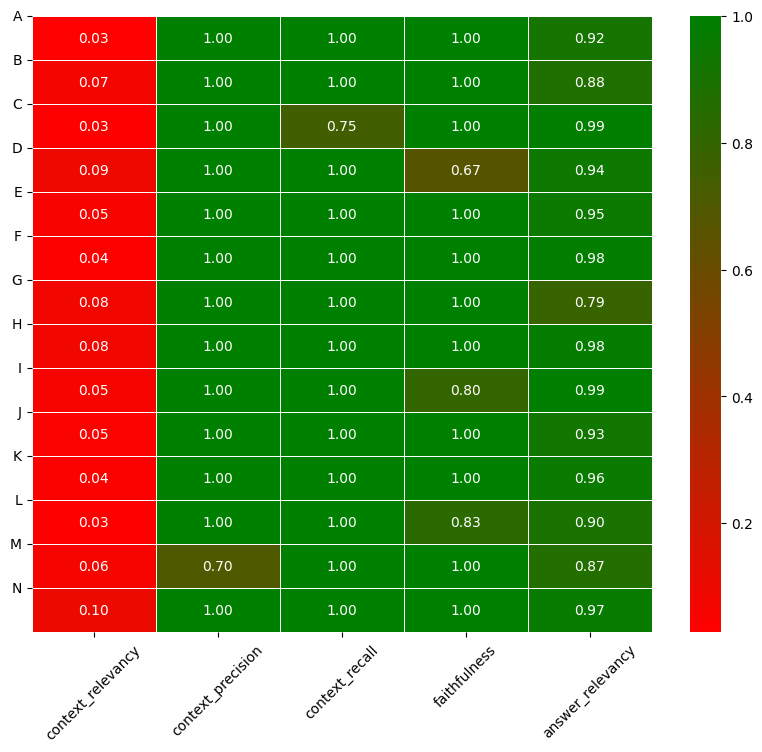

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# only use if not reading saved csv

# df = result.to_pandas()

heatmap_data = df[['context_relevancy', 'context_precision', 'context_recall', 'faithfulness', 'answer_relevancy']]

cmap = LinearSegmentedColormap.from_list('green_red', ['red', 'green'])

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", linewidths=.5, cmap=cmap)

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
length=len(df['question'])
plt.yticks(ticks=range(length), labels=labels[:length], rotation=0)
plt.xticks(rotation=45)

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


In [28]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
length=len(df['question'])
print(len(labels[:length]))

14
